<a href="https://colab.research.google.com/github/VAbhishek12/GoldPricePrediction/blob/main/gold_price_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime
from pylab import rcParams
import statsmodels.api as sm
from scipy.stats import skew, kurtosis

In [ ]:
# Define the ticker symbol for gold
gold_ticker = "GC=F"

end_date = datetime.datetime.now().strftime('%Y-%m-%d')

start_date = (datetime.datetime.now() - datetime.timedelta(days=8*365)).strftime('%Y-%m-%d')

data = yf.download(gold_ticker, start=start_date, end=end_date)

data = data.reset_index()

[*********************100%%**********************]  1 of 1 completed


In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-06-02,1212.400024,1217.000000,1209.599976,1209.800049,1209.800049,1627
1,2016-06-03,1209.099976,1244.500000,1206.400024,1240.099976,1240.099976,1622
2,2016-06-06,1244.400024,1247.300049,1240.000000,1244.599976,1244.599976,1135
3,2016-06-07,1244.000000,1244.900024,1236.500000,1244.400024,1244.400024,281
4,2016-06-08,1247.599976,1264.000000,1247.300049,1259.800049,1259.800049,406


In [ ]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2005,2024-05-23,2371.199951,2371.199951,2335.000000,2335.000000,2335.000000,365
2006,2024-05-24,2342.600098,2345.399902,2332.500000,2332.500000,2332.500000,25
2007,2024-05-28,2336.899902,2359.699951,2336.899902,2355.199951,2355.199951,26
2008,2024-05-29,2340.300049,2340.300049,2340.300049,2340.300049,2340.300049,26
2009,2024-05-30,2361.000000,2373.699951,2343.300049,2363.600098,2363.600098,173233


In [ ]:
data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2010,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000
mean,2020-06-01 22:01:47.462686720,1610.926070,1618.279105,1603.720598,1610.999203,1610.999203,5329.803483
min,2016-06-02 00:00:00,1126.900024,1132.800049,1123.900024,1127.800049,1127.800049,0.000000
25%,2018-06-05 06:00:00,1293.575012,1298.549988,1289.124969,1294.174988,1294.174988,46.000000
50%,2020-06-03 12:00:00,1686.399963,1702.900024,1673.299988,1684.199951,1684.199951,181.500000
75%,2022-05-31 18:00:00,1865.150024,1869.474976,1853.975006,1863.799988,1863.799988,556.500000
max,2024-05-30 00:00:00,2429.500000,2435.800049,2421.000000,2433.899902,2433.899902,386334.000000
std,NaN,307.307994,309.717730,305.151291,307.406102,307.406102,30118.400976


In [ ]:
data.info()
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2010 entries, 0 to 2009
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2010 non-null   datetime64[ns]
 1   Open       2010 non-null   float64       
 2   High       2010 non-null   float64       
 3   Low        2010 non-null   float64       
 4   Close      2010 non-null   float64       
 5   Adj Close  2010 non-null   float64       
 6   Volume     2010 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 110.1 KB
(2010, 7)


In [ ]:
missing_values = data.isnull().sum()
print(missing_values)


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


# EDA

<Axes: >

<Figure size 2400x500 with 0 Axes>

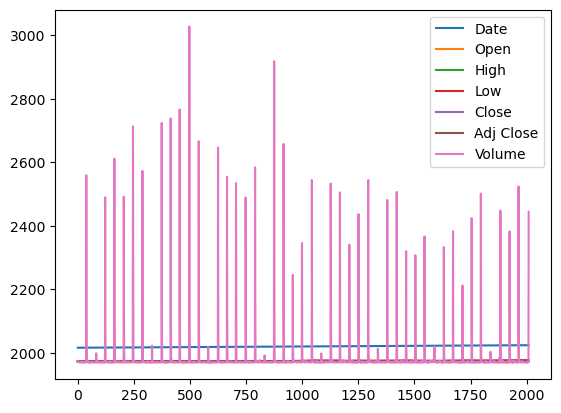

In [ ]:
plt.figure(figsize=(24,5))
data.plot()

In [ ]:
# taking required column

data = data[['Date', 'Close']]

In [ ]:
# making date as datetime type

data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
# renaming Close as Price

data.rename(columns = {'Close': 'Price'}, inplace = True)

In [ ]:
data['Price'] = np.round(data['Price'], 2)

In [ ]:
# grouping data by week, month and year

data_byweek = data.groupby(pd.Grouper(key = 'Date', freq = 'W')).mean()
data_bymonth = data.groupby(pd.Grouper(key = 'Date', freq = 'M')).mean()
data_byyear = data.groupby(pd.Grouper(key = 'Date', freq = 'Y')).mean()

In [ ]:
# rounding price by two decimal

for i in [data_bymonth, data_byweek, data_byyear]:
    i['Price'] = np.round(i['Price'], 2)

In [ ]:
# let us set Date as index and consider all date in the data (even holiday)

data1 = data.set_index('Date')
start_date = data1.index.min()
end_date = data1.index.max()
date_range = pd.date_range(start=start_date, end=end_date)
data1 = data1.reindex(date_range)

In [ ]:
data1.shape

(2920, 1)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2920 entries, 2016-06-02 to 2024-05-30
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   2010 non-null   float64
dtypes: float64(1)
memory usage: 45.6 KB


In [ ]:
data1.isnull().sum()

Price    910
dtype: int64

# Observation

In [ ]:
data1.fillna(data1.Price.mean(), inplace = True)

<Axes: xlabel='Date', ylabel='Price'>

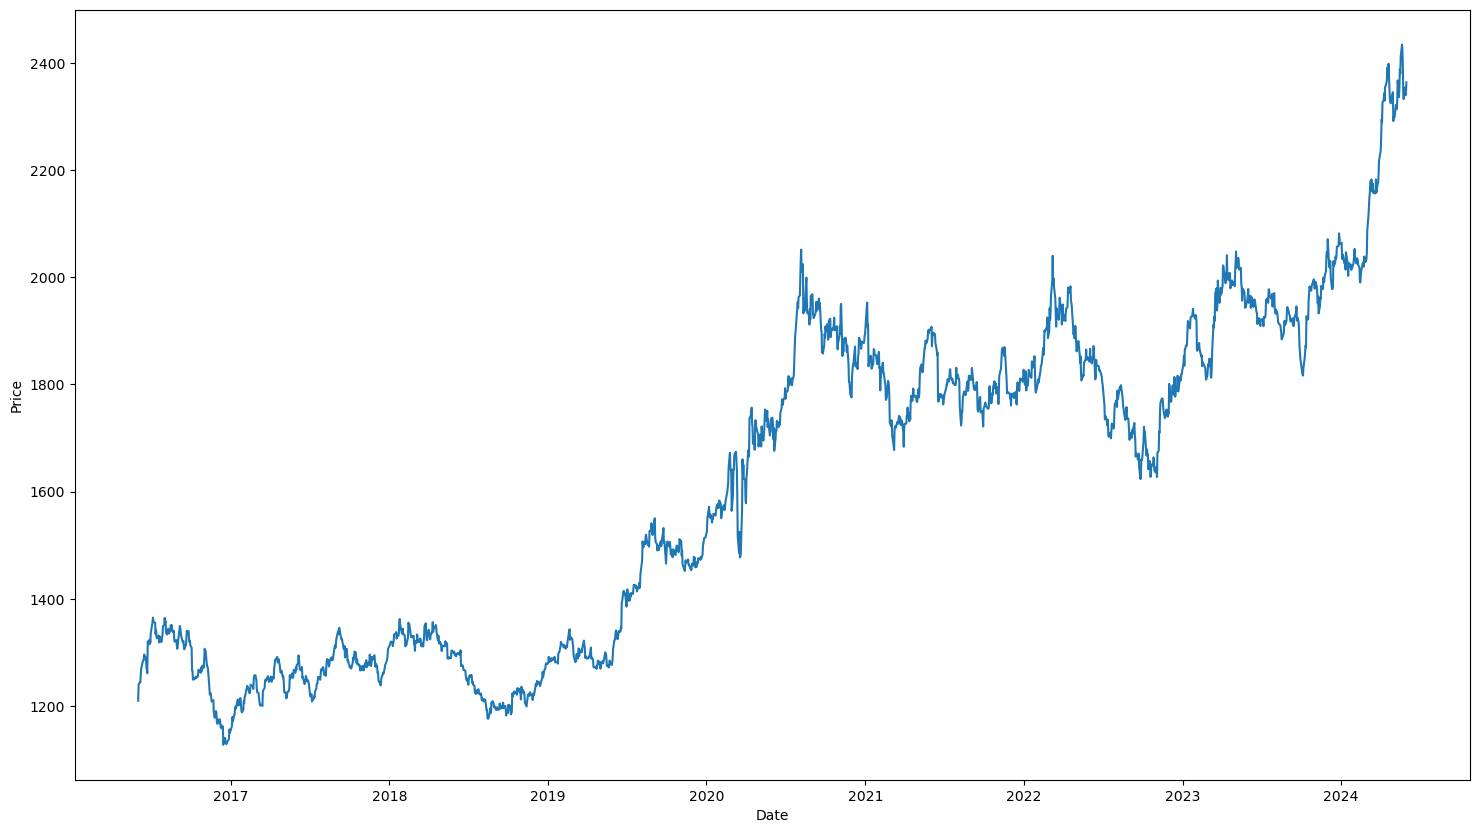

In [ ]:
# plot by day
plt.figure(figsize = (18, 10))
sns.lineplot(data = data, x = 'Date', y = 'Price')

<Axes: xlabel='Date', ylabel='Price'>

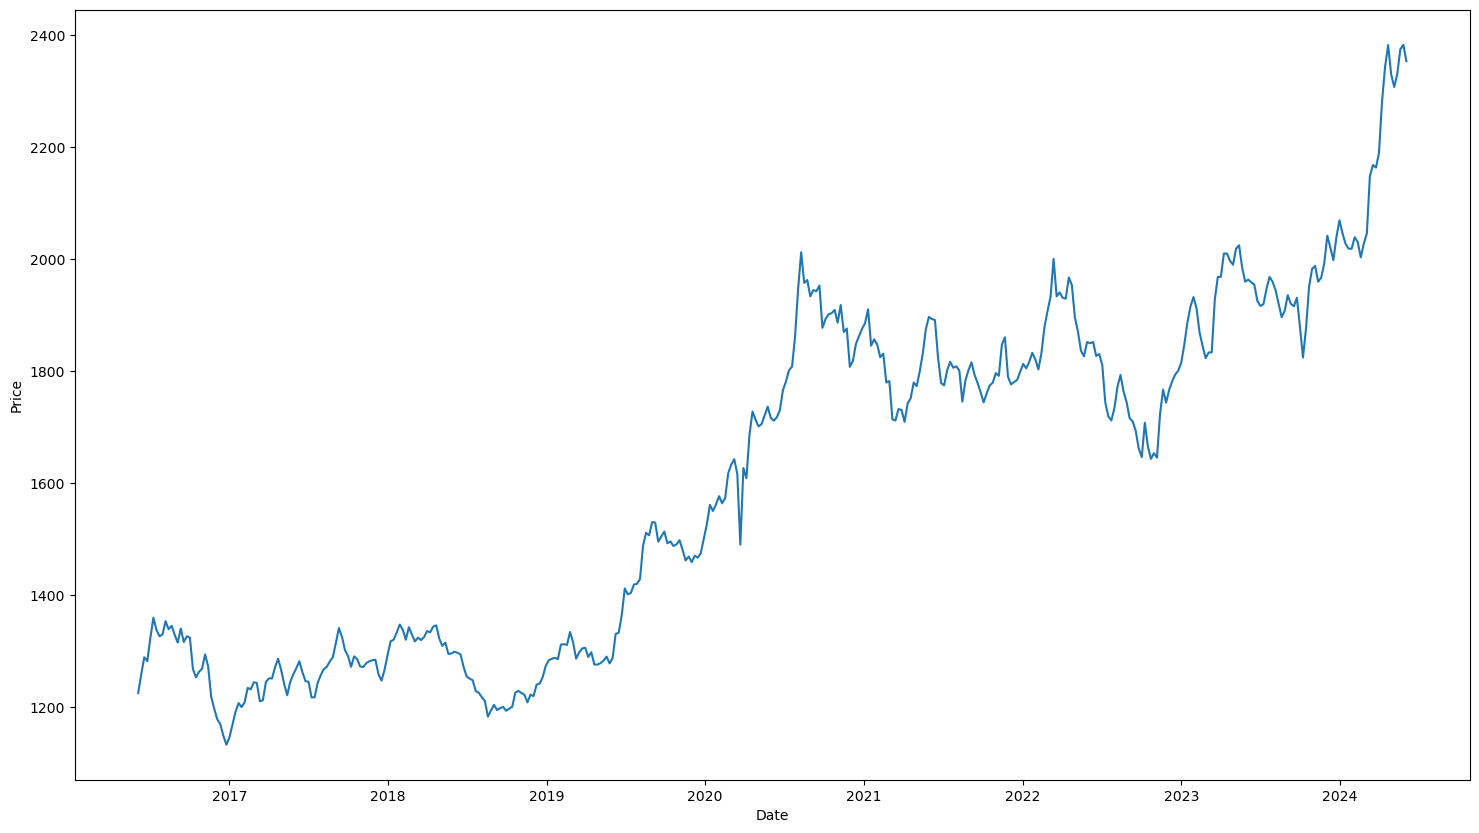

In [ ]:
# plot by week

plt.figure(figsize = (18, 10))
sns.lineplot(data = data_byweek, x = 'Date', y = 'Price')

<Axes: xlabel='Date', ylabel='Price'>

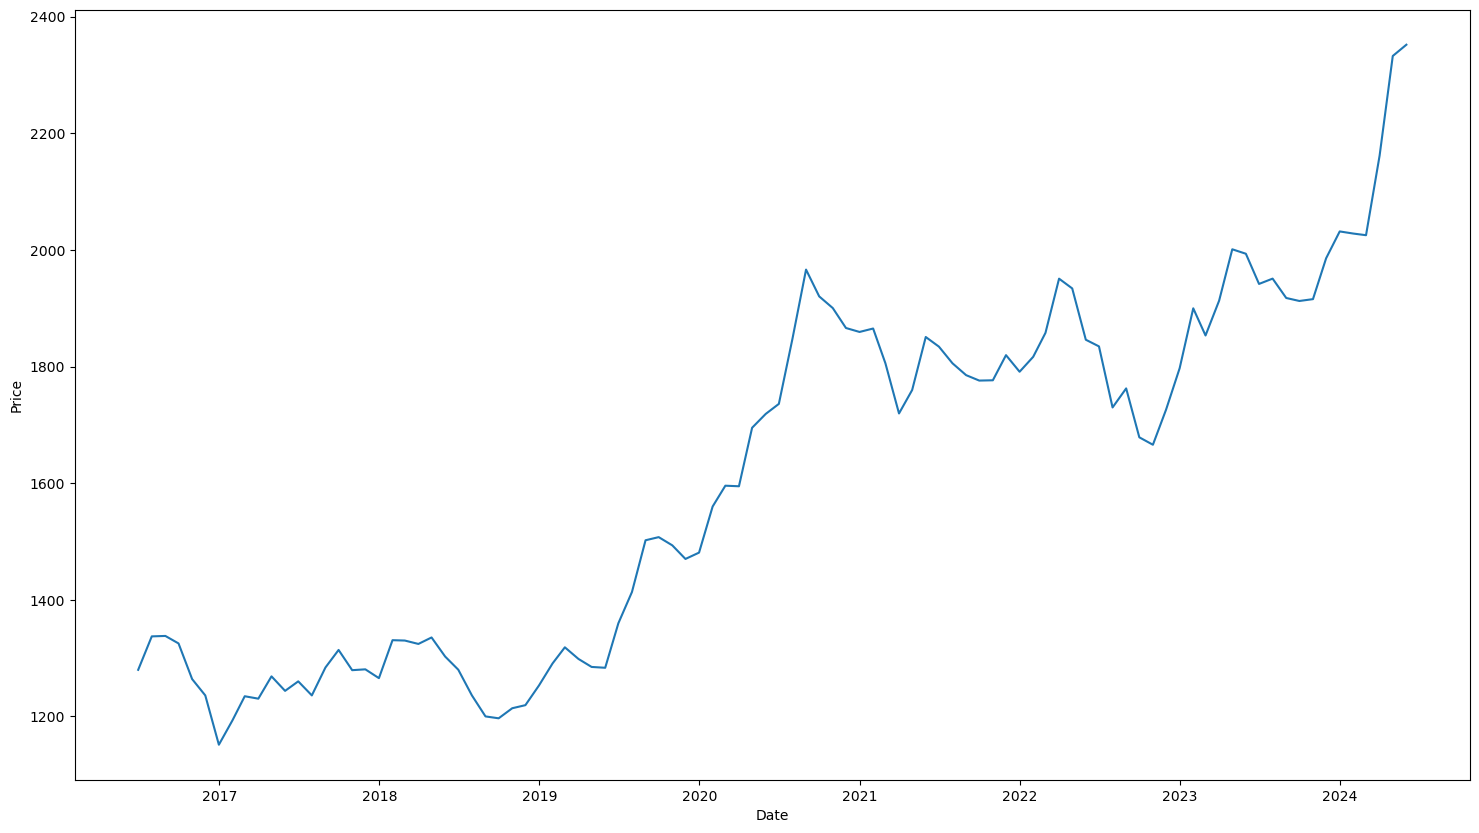

In [ ]:
# plot by month

plt.figure(figsize = (18, 10))
sns.lineplot(data = data_bymonth, x = 'Date', y = 'Price')

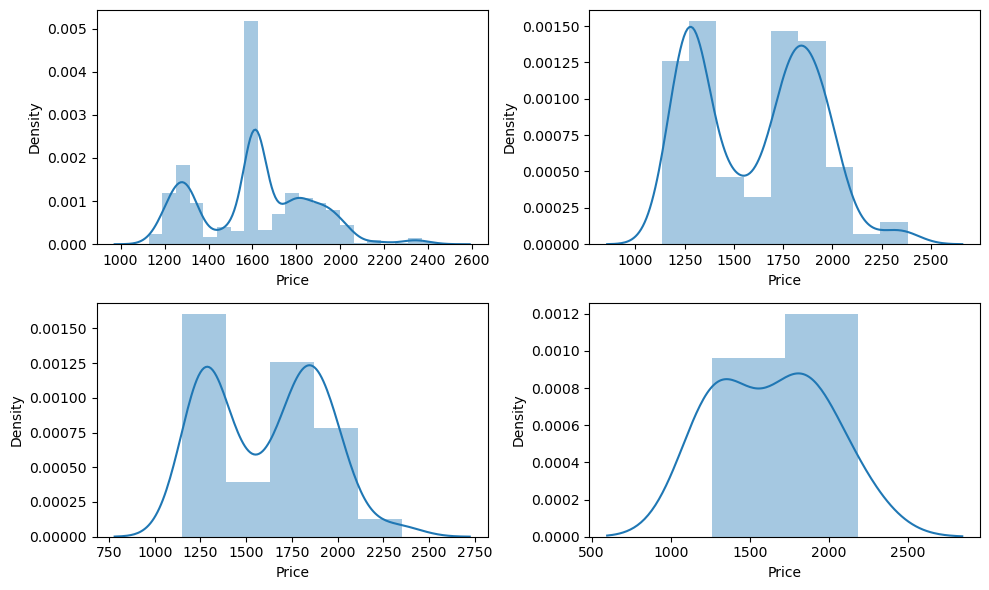

In [ ]:
# Let us see distribution of price

plt.figure(figsize = (10, 6))
for num, i in enumerate([data1, data_byweek, data_bymonth, data_byyear], 1):
    plt.subplot(2, 2, num)
    sns.distplot(i['Price'])

plt.tight_layout()

In [ ]:
# Let us see the value of Skewness and Kurtosis for daily price column

from scipy.stats import skew, kurtosis

skew_value = round(skew(data1['Price']), 4)
kurt_value = round(kurtosis(data1['Price']), 4)
print('The value of skewness for price data is,', skew_value)
print('The value of kurtosis for price data is,', kurt_value)

The value of skewness for price data is, 0.189
The value of kurtosis for price data is, -0.3093


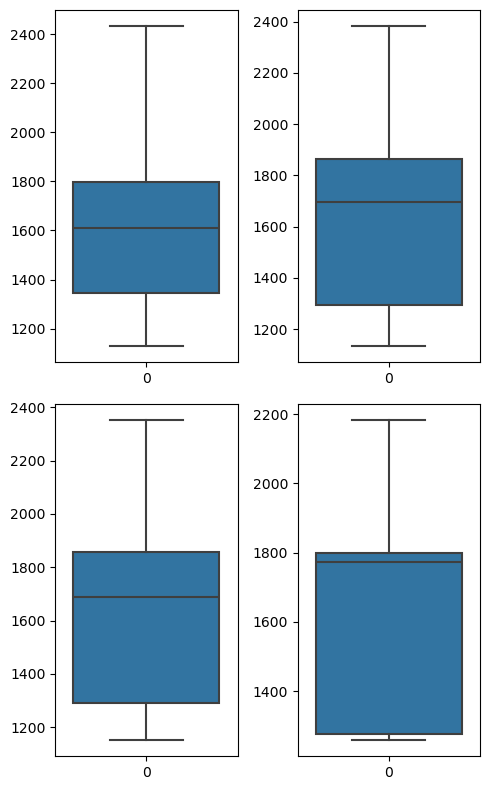

In [ ]:
# let us see boxplot of price

plt.figure(figsize = (5, 8))
for num, i in enumerate([data1, data_byweek, data_bymonth, data_byyear], 1):
    plt.subplot(2, 2, num)
    sns.boxplot(i['Price'])


plt.tight_layout()

In [ ]:
# Let us check outliers using IQR method

for col in data1.columns:
    q1 = np.percentile(data1[col], 25)
    q3 = np.percentile(data1[col], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers = data1[(data1[col] < lower_bound) | (data1[col] > upper_bound)]

print('Total number of outliers in the given dataset is,', len(outliers))

Total number of outliers in the given dataset is, 0


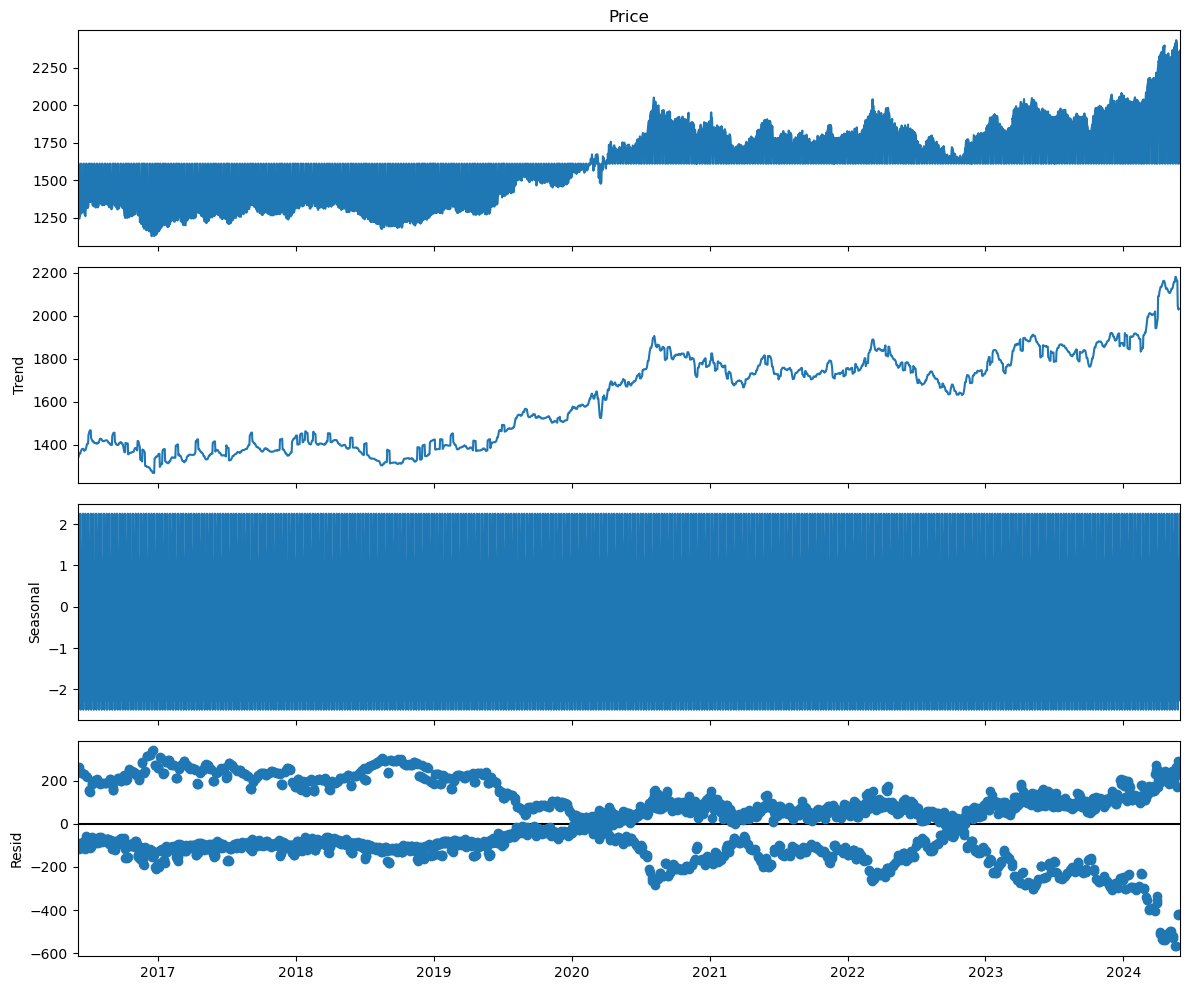

In [ ]:
# From above boxplot as well as IQR method, we can say that there is no outlier in the price column.
# Now let us look at the series decomposition

rcParams['figure.figsize'] = 12, 10
decomposition = sm.tsa.seasonal_decompose(data1.Price, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

In [ ]:
#In above decomposition, we can see the trend is upward, but the error i.e. residual is too high and seasonality is unclear.

# Let us resample the data by weekly basis

data1_byweekly = data1.resample('W').mean()

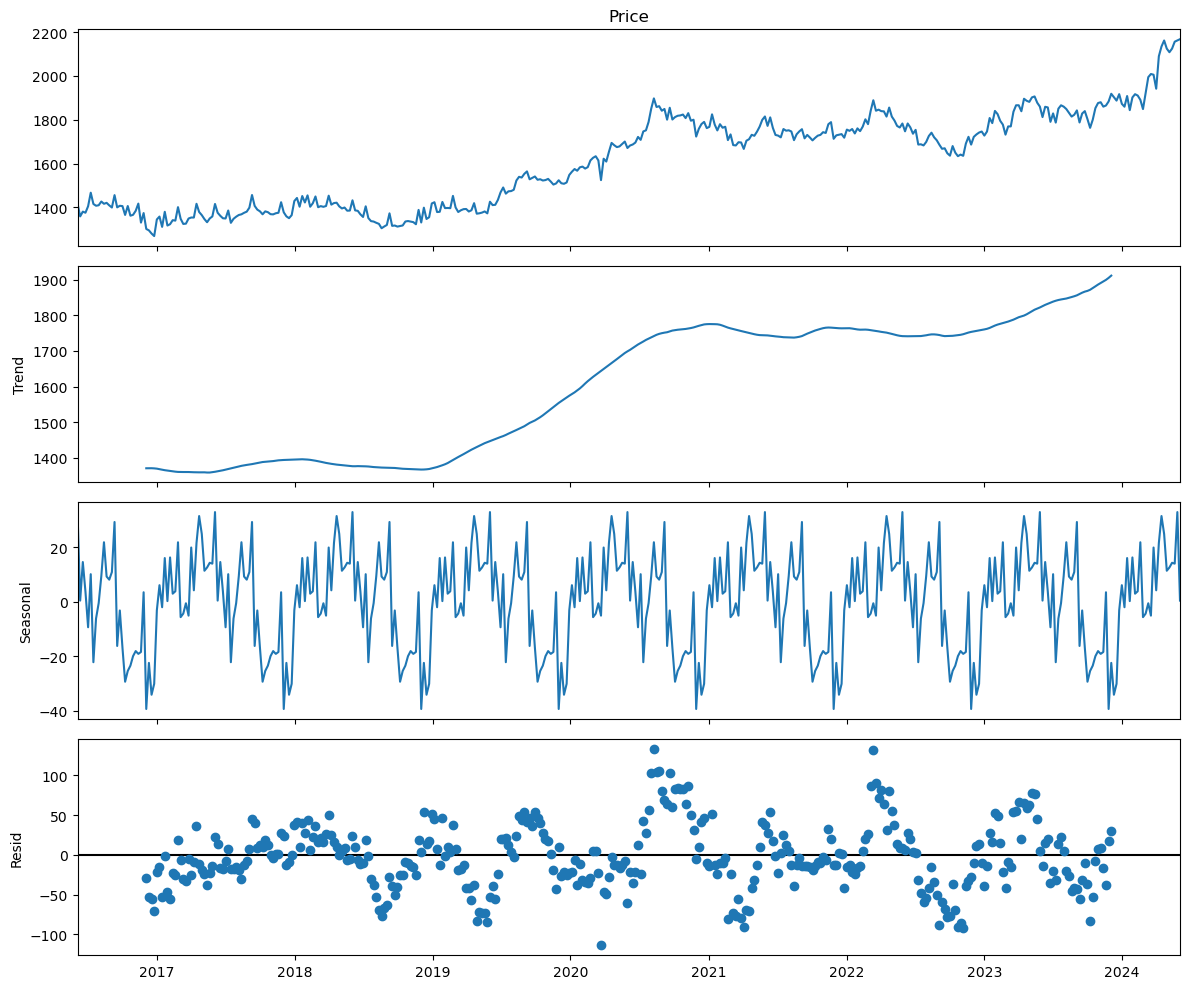

In [ ]:
# let us again see the decomposition plot

rcParams['figure.figsize'] = 12, 10
decomposition = sm.tsa.seasonal_decompose(data1_byweekly.Price, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

In [ ]:
# Now, we can see some clearity in seasonality and less residual points.

In [ ]:
# Let us again resample by monthly basis and see the decomposition.

data1_bymonthly = data1.resample('M').mean()

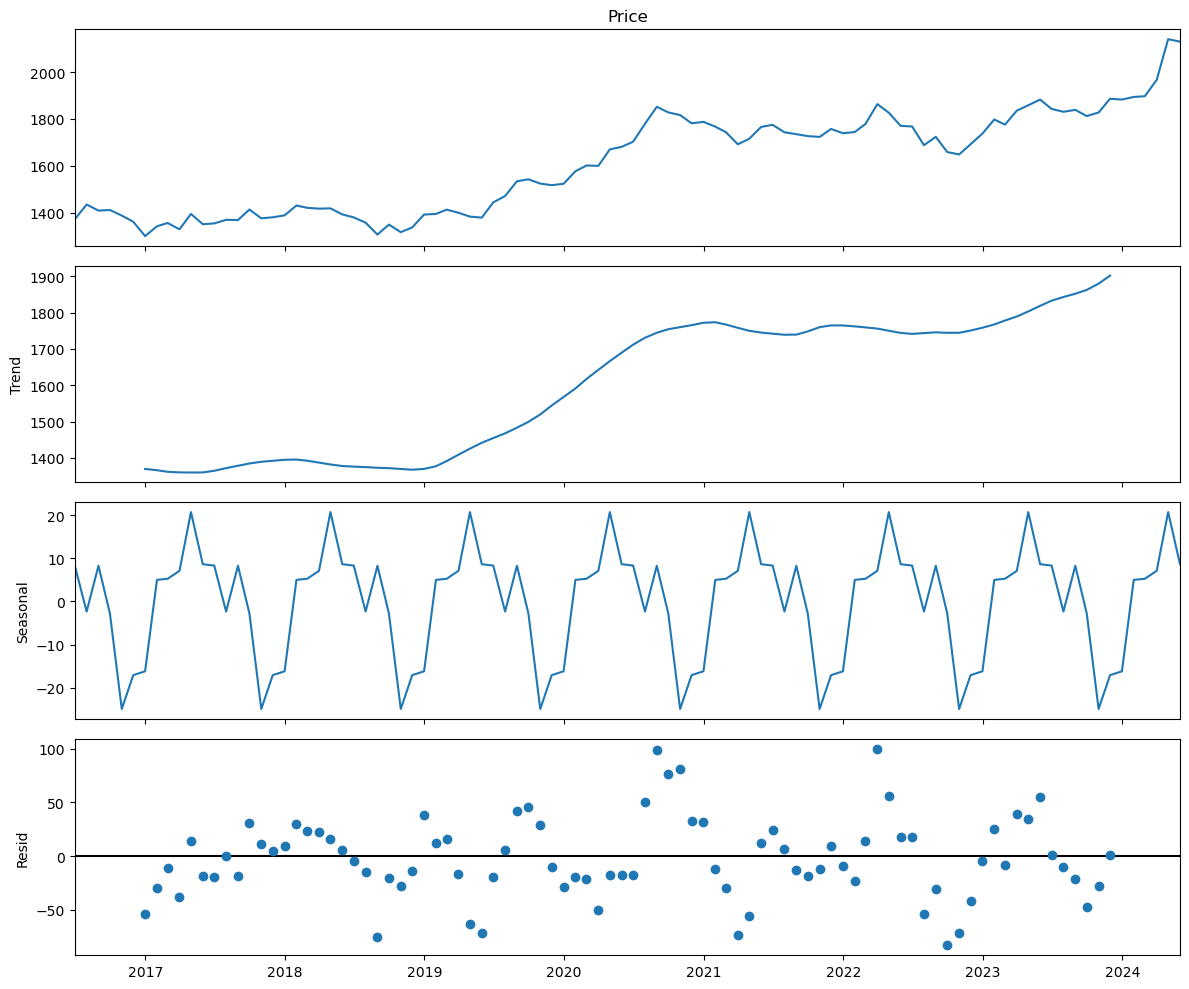

In [ ]:
# Let us see the desomposition plot

rcParams['figure.figsize'] = 12, 10
decomposition = sm.tsa.seasonal_decompose(data1_bymonthly.Price, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

In [ ]:
# In above decomposition, we can see clear trend, seasonality and less residual points.

# Test of stationary

In [ ]:
# Now, let us check whether the dataset is stationary or not using ADF(Augumented Dicky-Fuller Test).

from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data1_bymonthly['Price'])

if (adf_test[1] > 0.05):
    print('The given time series data is not stationary')
else:
    print('The given time series data is stationary')

The given time series data is not stationary


### As given time data series is not stationary, let us make it stationary by making mean and variance constant.

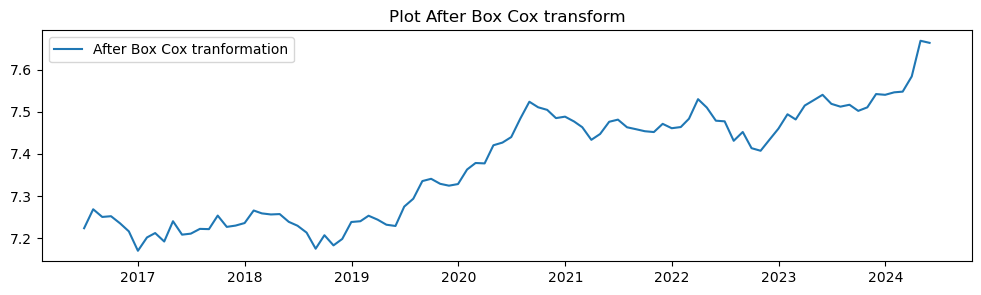

In [ ]:
# let us make variance constant using box cox transformation

from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data1_bymonthly['Price'], lmbda=0), index = data1_bymonthly.index)

plt.figure(figsize=(12,3))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('Plot After Box Cox transform')
plt.show()

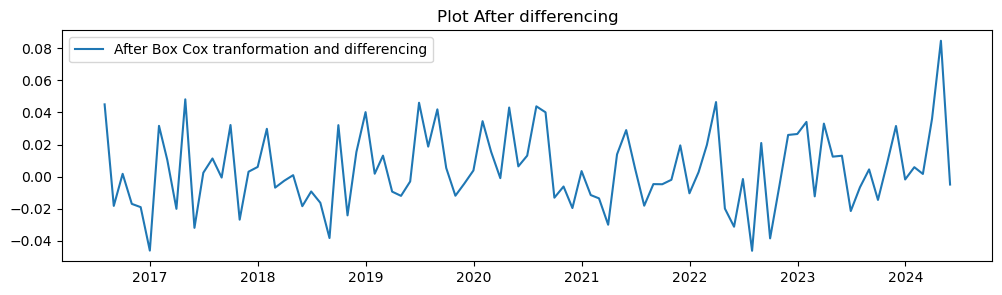

In [ ]:
# Now, to stabalize both mean and variance, let us perform differencing i.e. remove trend

data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), data1_bymonthly.index)
plt.figure(figsize=(12,3))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('Plot After differencing')
plt.show()

In [ ]:
# Let us look at data_boxcox_diff series

data_boxcox_diff.head()

2016-06-30         NaN
2016-07-31    0.045041
2016-08-31   -0.018252
2016-09-30    0.001746
2016-10-31   -0.016987
Freq: M, dtype: float64

In [ ]:
# Let us remove the NA value we have in the series

data_boxcox_diff.dropna(inplace=True)

In [ ]:
# Now, let us again perform ADF to check whether the time series data is stationary or not

from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data_boxcox_diff)

if (adf_test[1] > 0.05):
    print('The given time series data is not stationary')
else:
    print('The given time series data is stationary')

The given time series data is stationary


# ACF and PACF Plot

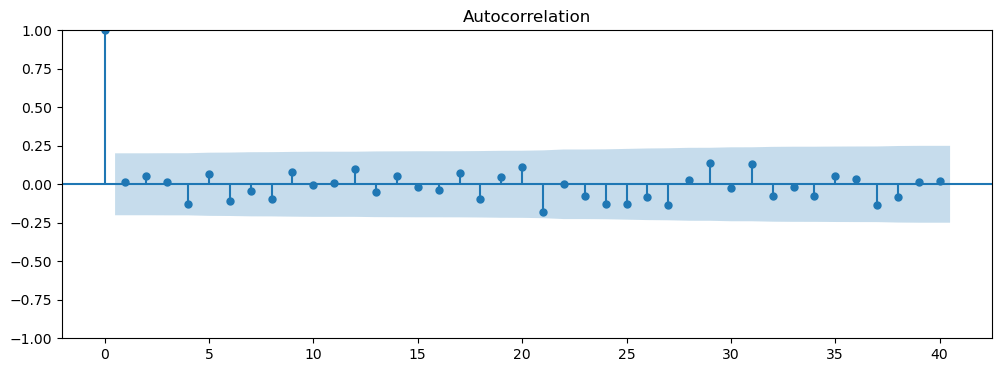

In [ ]:
# Let us plot ACF

from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags = 40)
plt.show()

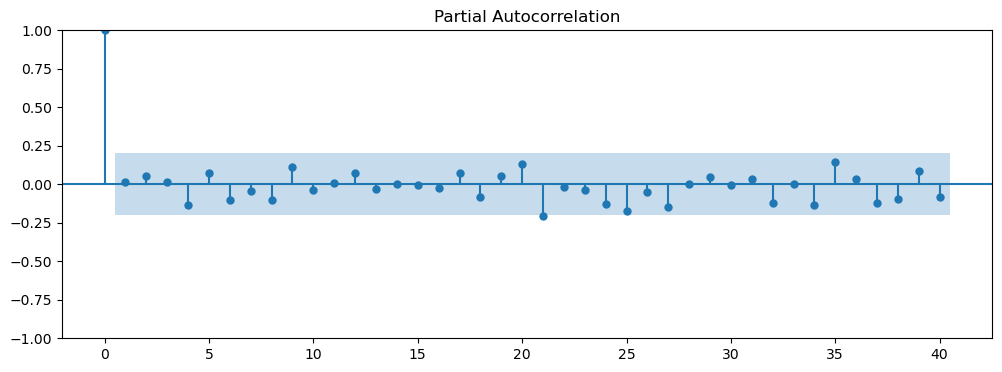

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags = 40)
plt.show()

## Observation

As there is no spike outside the error band in ACF plot. This suggest that there is no need of MA component in ARIMA plot. Hence, q = 0.
Also, we can see spike outside the error range at lag 21 in PACF plot. So, we can say that AR component of ARIMA model has a value of p = 21.

# Model Building

In [ ]:
# Let us split traning and testing data

train_len = 84  # 84 months training data (total number of months in a dataset are 96)
train = data1_bymonthly[0:train_len]
test = data1_bymonthly[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

In [ ]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(train_data_boxcox_diff, order=(10, 0, 0))
model_fit = model.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
y_hat = data_boxcox_diff.copy()
y_hat['forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat['forecast_boxcox'] = y_hat['forecast_boxcox_diff'].cumsum()
y_hat['forecast_boxcox'] = y_hat['forecast_boxcox'].add(data_boxcox[0])
y_hat['forecast'] = np.exp(y_hat['forecast_boxcox'])

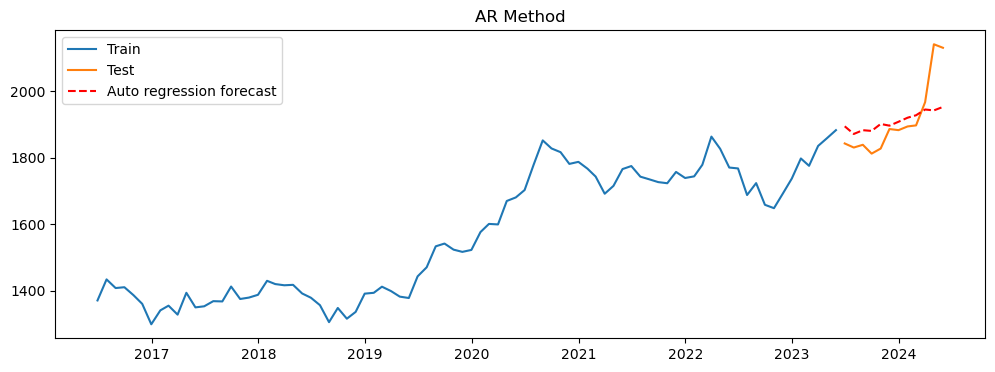

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat['forecast'][test.index.min():], "--", label='Auto regression forecast', color = 'red')
plt.legend(loc='best')
plt.title('AR Method')
plt.show()

In [ ]:
# Let us calculate root mean square error and mean absolute percentage error

from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test['Price'], y_hat['forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat['forecast'][test.index.min():])/test['Price'])*100,2)
print('Root mean square error is', rmse)
print('Mean absolute percentage error is, ', mape, '%')

Root mean square error is 86.63
Mean absolute percentage error is,  3.23 %


In [ ]:
# let us do forcasting of price using above model

forecast_steps = 10
forecast_diff = model_fit.forecast(steps=forecast_steps)

# Inverse differencing
forecast_boxcox = forecast_diff.cumsum()
last_original_value = data_boxcox.iloc[-1]
forecast_boxcox = forecast_boxcox.add(last_original_value)

# Inverse Box-Cox transformation
forecast = np.round(np.exp(forecast_boxcox), 2)

# Model Deployment

In [ ]:
import joblib

joblib.dump(model_fit, 'gold_forecast.joblib')

['gold_forecast.joblib']

In [ ]:
%%writefile "app.py"
import streamlit as st
import joblib
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import boxcox
import datetime
import warnings

warnings.filterwarnings("ignore")


# Define the ticker symbol for gold and download gold data
gold_ticker = "GC=F"
end_date = datetime.datetime.now().strftime('%Y-%m-%d')
start_date = (datetime.datetime.now() - datetime.timedelta(days=8*365)).strftime('%Y-%m-%d')
data = yf.download(gold_ticker, start=start_date, end=end_date)
data = data.reset_index()
data = data[['Date', 'Close']]
data['Date'] = pd.to_datetime(data['Date'])
data.rename(columns = {'Close': 'Price'}, inplace = True)
data['Price'] = np.round(data['Price'], 2)
data1 = data.set_index('Date')
start_date = data1.index.min()
end_date = data1.index.max()
date_range = pd.date_range(start=start_date, end=end_date)
data1 = data1.reindex(date_range)
data1_bymonthly = data1.resample('M').mean()
data_boxcox = pd.Series(boxcox(data1_bymonthly['Price'], lmbda=0), index = data1_bymonthly.index)


# Load the pre-trained ARIMA model
loaded_model = joblib.load('gold_forecast.joblib')

# Function to find the last day of a given month and year
def last_day_of_month(year, month):
    return pd.Timestamp(year,month, 1) + pd.offsets.MonthEnd(0)

st.title("Gold Price Predition")
# Take input for year and month
year = int(st.number_input("Enter the year: ", placeholder = "Type in YYYY format", value = 2024, step = 1))
month = int(st.number_input("Enter the month: ", placeholder = "Type in MM format...", value = 5, step = 1))


# Find the last day of the given month and year
last_day = last_day_of_month(year, month)
last_day_formatted = last_day.strftime('%Y-%m-%d')

# Forecast gold price for the last day of the given month and year
forecast_steps = (last_day - pd.Timestamp.now()).days
forecast_diff = np.round(loaded_model.forecast(steps=forecast_steps), 6)

# Inverse differencing
forecast_boxcox = forecast_diff.cumsum()
last_original_value = data_boxcox.iloc[-1]
forecast_boxcox = forecast_boxcox.add(last_original_value)

# Inverse Box-Cox transformation
forecast = np.round(np.exp(forecast_boxcox), 2)


button = st.button("Submit")

if button:
    st.text(f"Forecasted Monthly Gold Futures Price: {forecast[last_day_formatted]} USD")

Overwriting app.py


In [ ]:


warnings.filterwarnings("ignore")


# Define the ticker symbol for gold and download gold data
gold_ticker = "GC=F"
end_date = datetime.datetime.now().strftime('%Y-%m-%d')
start_date = (datetime.datetime.now() - datetime.timedelta(days=8*365)).strftime('%Y-%m-%d')
data = yf.download(gold_ticker, start=start_date, end=end_date)
data = data.reset_index()
data = data[['Date', 'Close']]
data['Date'] = pd.to_datetime(data['Date'])
data.rename(columns = {'Close': 'Price'}, inplace = True)
data['Price'] = np.round(data['Price'], 2)
data1 = data.set_index('Date')
start_date = data1.index.min()
end_date = data1.index.max()
date_range = pd.date_range(start=start_date, end=end_date)
data1 = data1.reindex(date_range)
data1_bymonthly = data1.resample('M').mean()
data_boxcox = pd.Series(boxcox(data1_bymonthly['Price'], lmbda=0), index = data1_bymonthly.index)


# Load the pre-trained ARIMA model
loaded_model = joblib.load('gold_forecast.joblib')

# Function to find the last day of a given month and year
def last_day_of_month(year, month):
    return pd.Timestamp(year,month, 1) + pd.offsets.MonthEnd(0)

st.title("Gold Price Predition")
# Take input for year and month
year = int(st.number_input("Enter the year: ", placeholder = "Type in YYYY format", value = 2024, step = 1))
month = int(st.number_input("Enter the month: ", placeholder = "Type in MM format...", value = 5, step = 1))


# Find the last day of the given month and year
last_day = last_day_of_month(year, month)
last_day_formatted = last_day.strftime('%Y-%m-%d')

# Forecast gold price for the last day of the given month and year
forecast_steps = (last_day - pd.Timestamp.now()).days
forecast_diff = np.round(loaded_model.forecast(steps=forecast_steps), 6)

# Inverse differencing
forecast_boxcox = forecast_diff.cumsum()
last_original_value = data_boxcox.iloc[-1]
forecast_boxcox = forecast_boxcox.add(last_original_value)

# Inverse Box-Cox transformation
forecast = np.round(np.exp(forecast_boxcox), 2)


button = st.button("Submit")

if button:
    st.text(f"Forecasted Monthly Gold Futures Price: {forecast[last_day_formatted]} USD")


[*********************100%%**********************]  1 of 1 completed


NameError: name 'st' is not defined

In [ ]:
!pip install streamlit


In [ ]:
import streamlit as st
import joblib
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import boxcox
import datetime
import warnings